### Рекомендательыне Системы

**Основная Задача РС**
- Отранжировать какой-то набор объектов согласно какому-то критерию
- Предсказать оценку для объекта (рейтинг)

Типовой случай - персональные рекомендации в котором 2 действующих лица - пользователь и объект (книга, фильм, вещь ...)
которые "взаимодействуют" друг с другом

### Что Предсказываем?
Обычно это непрерывный или бинарный таргет
 - Непрерывный - рейтинг, длительность просмотра
- Бинарный - покупка/не покупка, like/dislike ...

Базовый датасет представляет собой матрицу **Пользователи - Объекты**

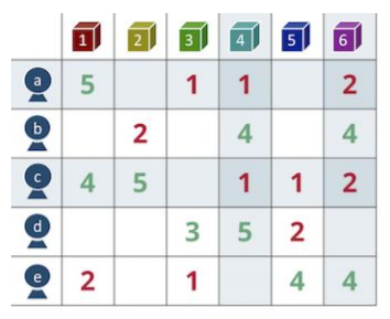


### Как Выглядит Dataset?
Мы обязательно должны иметь:
- `user_id`
- `item_id`

Хорошо если есть:
- Оценка
- Время

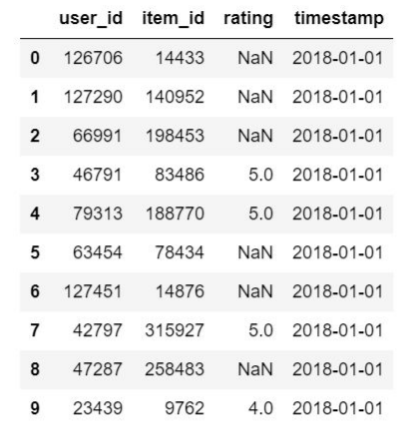

**Имеем лог `user-item-rating`**


### Explicit и Implicit Feedback 
Оказывается, что таргет может быть явным (explicit) и неявным (implicit)

- **Explicit** - можно доверять (оценки, покупки, лайки пользователей)
- **Implicit** - сложно доверять (просмотры, клики, время просмотра товара)

У Implicit действия неявно говорят о том, как пользователь оценил объект 

### Что Значит Наиболее Подходящий Объект?
- То что популярно:
    - Глобально
    - По категориям (по жанрам фильмам, категориям товаров...)
- Похожий Объект 
- С чем взаимодействуют похожие люди

### Виды РС
Верхнеуровнево - персонализированные и не персонализированные 

Персонализированные:
- `Content-based Filtering` (используем признаковые описания пользователей/объектов)


- `Collaborative Filtering` (не используем какие-либо признаки, а используем историю взаимодействий пользователей с объектами)
    - **Neighbour-based** (Эвристики на схожести/близости)
        - Item2Item (матрица схожести объектов)
        - User2User (матрица схожести пользователей)
    - **Model-based**


- `Hybrid`


- `Knowledge-based` (когда вышеперечисленные методы использовать не получается, экспертные оценки и правила)

### Collaborative Filtering
Основной вид данных для таких систем - разреженная матрица с историей взаимодействия пользователей и объектов

### Постанова Задачи 
Почти всегда имеем пользователей `U` (users) и объекты `I` (items) 

Также необходимо определить релевантность объекта `i` для пользователя `u` (т.е. иметь некоторую оценку `r`)

- Users, $u \in U$ 
- Items, $i \in I$
- Rating/Mark, $r_{ui} \in  R$
- Events, $(u, i, r_{ui}, ...) \in E$

Событие - когда пользователь $u_{i}$ поставил объекту $i_{i}$ оценку $r_{ui}$ при каких-то обстоятельствах. 

`...` означает контекст при котором было совершено проставление оценки $r_{ui}$ 

**Основная Задача** - найти для пользователя `u` объект `i` c максимальной оценкой `r`

1. Выделить похожие объекты
    - $i → \{i_{1}, ..., i_{n}\}$ 
    
    
2. Выделить похожих пользователей 
    - $u → \{u_{1}, ..., u_{n}\}$ 
    
    
3. Предсказать
    - $\tilde{r_{ui}} = h(u, i, ...) $
    
    
**Задача рекомендации очень схожа с задачей информационного поиска** на выходе мы получаем некий ранжированный список и топ-k элементов этого списка показываем пользователям

### Метрики 
- MAE
- RMSE
- Precision@K
- Recall@K
- Map@K
- DCG@K

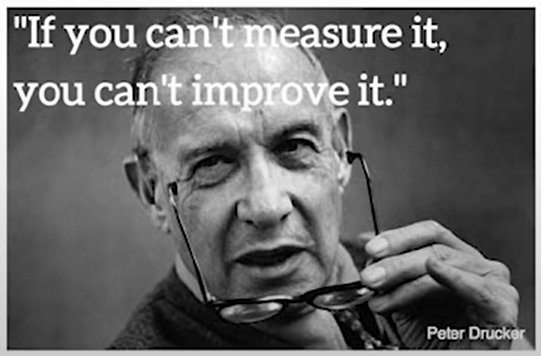

### Хорошо ли Использовать MAE или RMSE?
Мы можем измерять качество рекомендаций, используя MAE или RMSE. Например, мы можем неплохо минимизировать разность между истинной оценкой и предсказанной, но есть очень существенный элемент - порядок. 

Данный метрики никак не учитывают порядок рекомендаций которые мы предсказываем, ведь не факт, что он правильный. Поэтому можем использовать, например, классификационные метрики:

### Classification Metrics
### Precision@K

$Precision@k = \frac{TP}{K}$

Число релевантных рекомендаций среди всех рекоменаций, которые мы предлагаем пользователю.

**Интерпретация** - доля релевантных рекомендаций. Например, 2 из 5 рекомендация релевантны: `Precision@5 = 0.4`

### Recall@K

$Recall@K = \frac{TP}{TP + FN}$

- `TP + FN` - количество **известных релевантных объектов для пользователя**

**Интерпретация** - доля релевантных объектов, попавших в рекомендации среди всех релевантных объектов для пользователя

Классификационные метрики уже неплохо показывают качество наших **топ-К рекомендаций, но они учитывают только попадания. А мы также хотим, чтобы наши релевантные рекомендации находились как можно выше.**

Здесь нам и помогут ранжирующие метрики, которые будут оценивать наши попадания, но с весами:
- Mean Reciprocal Rank
- Mean Average Precision (MAP)
- Normalized Discounted Cumulative Gain (NDCG)

В классификационных метриках нам важны:
- `True Positive` (модель рекомендовала товар с которым пользователь взаимодействовал)
- `False Negative` (модель не порекомендовала товар с которым ползователь взаимодействовал)

А что с FP и TN? На самом деле, эти величины не показательны. Они обычно очень больше, так как пользователи взаимодействуют с очень малым количество объектов относительно общего числа объектов. И практика показывает, что этими значениями можно пренебречь.

### Ranking Metrics
Эти метрики оценивают качество топ-N рекомендаций c учетом рангов/позиций. Основная идея - оценить "попадания" с весом, зависящим от позиции (обычно это обратная пропорциальная зависимость, то есть чем больше позиция, тем меньше вес). Основные метрики следующие:

### DCG@K

$DCG@K = \sum_{i=1}^{K} \frac{2^{r_{i}} - 1}{log_{2}(i + 1)}$

Позволяет оценивать ранжированный список того чего мы получаем. Базовая метрика информационного поиска

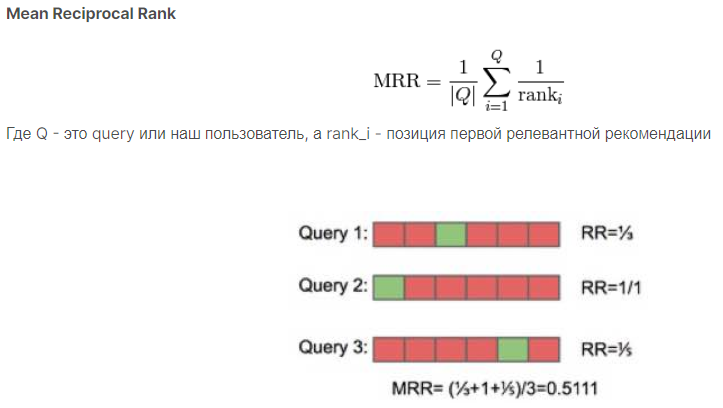

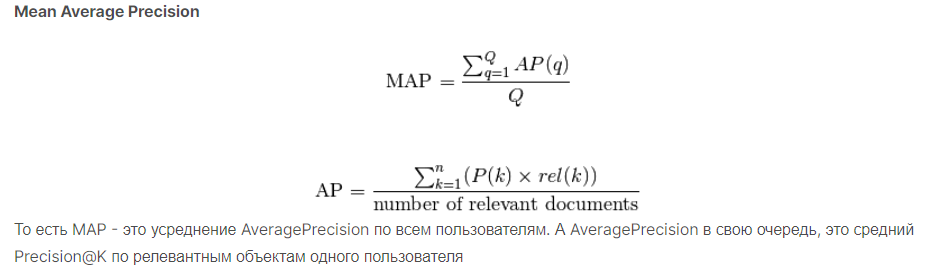

Более подробно смотри в папке `materials`

### Не все можно измерить ((

Не все действия в рекомендациях можно измерить, ну или не совсем ясно как. Например:
- Разнообразие (каким большим должно быть разнообразие рекомендуемых товаров? 2, 5 или 10???)
- Новизна (на сколько новым/современным должен быть рекомендуемый объект???)
- Доверие (на сколько пользователь поверит рекомендации??? Не испугается ли???)

### Категории Метрик
Метрики качества можно разделить на следующие:
- Регрессионные 
- Классификационные
- Ранжирующие 

Все оценки качества рекомендация делятся на 2 категории:
- `offline` (по историческим данным)
- `online` (наблюдаемые в эксперименте, продакшн, как пользователи взаимодействуют с РС в реальном мире)

Рост `offline` метрик не гарантирует рост `online`

А

### User-Based Approach 
Являетя методом **Collaborative Filtering**. 

Рассмотрим пример:

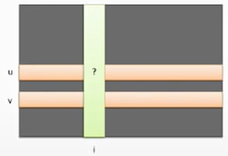

Мы хотим для пользователя `u` спрогнозировать оценку `r` для объекта `i`

Первым делом необходимо определить функцию похожести между пользователями `sim_func(U)`:
- Косинусная Мера 
- Скалярное Произведение
- Корреляция Пирсона
- Что-нибудь необычное (собственные эвристики)

Тогда, оценку можем спрогнозировать таким образом:

$\tilde{r_{ui}} = \overline{r_{u}} + \frac{\sum_{v_{i}} sim(u,v)*(r_{vi} - \overline{r_{v}})}{\sum_{v_{i}} sim(u,v)}$

$\overline{r_{u}}$ и $\overline{r_{v}}$ - средняя оценка пользователя (описывает пользователя - любит ставить лайки, дизлайки, нейтрален)

### Item-Based Approach
Аналогичен user-based только идём от товара

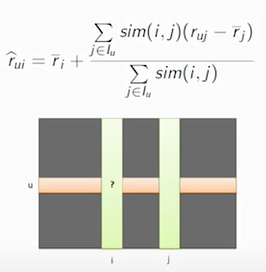

### Проблемы Item-Based и User-Based Подходов
Что делать с объектами или пользователями по которым совсем нет никаких данных - новые пользователи или товары. 

Возникает **проблема холодного старта**

**Методы Борьбы**
- Amazon, статья 2003г.
        Заполнить пропущенные значения статистикой по товарам которые пользователь покупает, взаимодействовал вместе
        
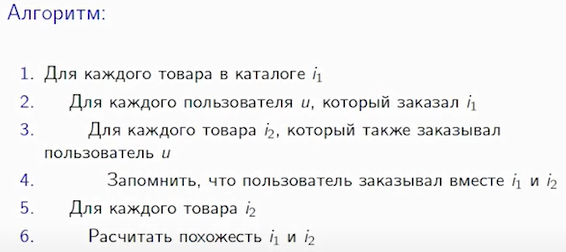


- YouTube, статья 2010г.
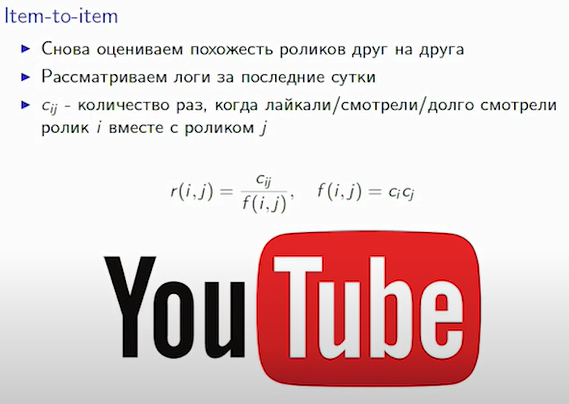

### Model-Based
Основная идея - использовать матричное разложение:

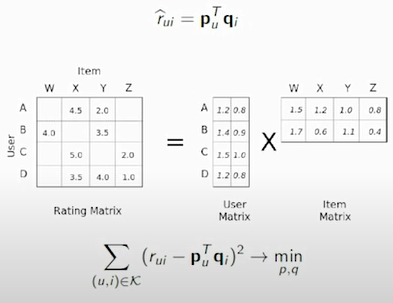


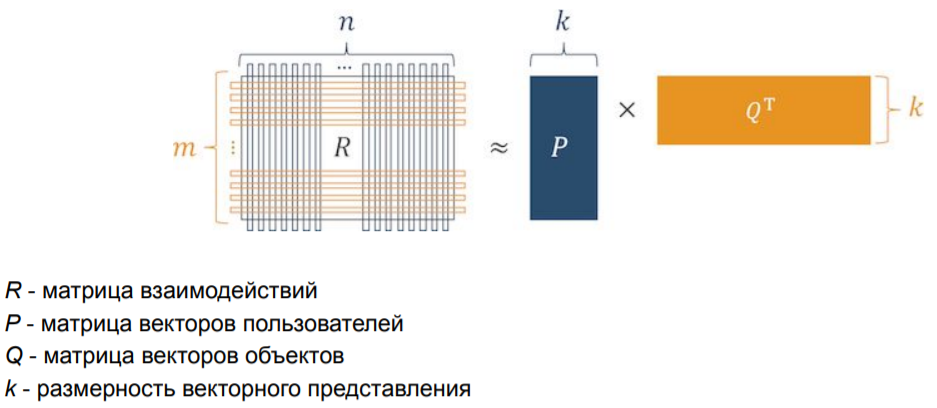

Приблизим исходную матрицу произведение 2-х други матриц (матрица пользователей и объектов, имеют меньший ранг)

**Матрицы P и Q являются матрицами меньшего размера, они будут являться эмбеддингами пользователей и объектов** 

Также почти всегда вводится член регуляризации для предотвращения переобучения

**Модель SVD**
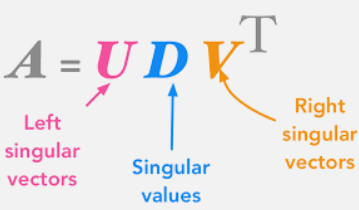

- Матрица левых собственных значений (`m x k`)
- Матрица сингулярных чисел (`k x k`)
- Матрица правых собственных значений (`k x n`)

На практике, мы не хотим полностью восстанавливать исходную матрицу, а хотим лишь её приблизить. Поэтому, для приближения мы берём лишь k - значений


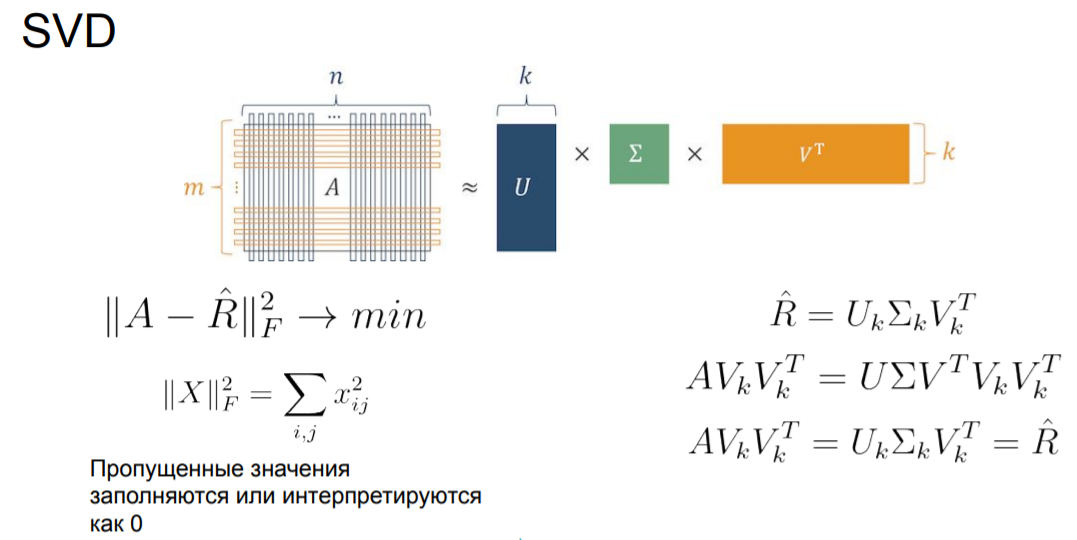

Также, для экономии памяти нет необходимости хранить все 3 матрицы, можно ограничиться лишь одной - V


**Однако SVD разложение применяется для матриц без пропусков, а мы имеем дело с разреженными матрицами.** Поэтому пропуски нужно как-то заполнить 

Также согласно задаче - необходимо приблизить исходную матрицу произведением 2-х других, а мы имеем 3 матрицы. Что-то не сходится))

Можем заменить исходные значения на нули, однако это плохо, алгоритм будет на них настраиваться 





**Методы Оптимизации**
- `SGD`
- `ALS`
- `Implicit-ALS` (когда feedback - implicit)

### Factorization Machines
Факторизационные машины представлены как универсальная модель коллаборативной фильтрации, обобщающая многие из известных моделей. Ещё называют - модель квадратичной регрессии и позволяет учитывать дополнительную информацию и контекст при построении рекомендаций. 

Реализована в библиотеке `libfm`

Очень популярны и часто используются в соревнованиях

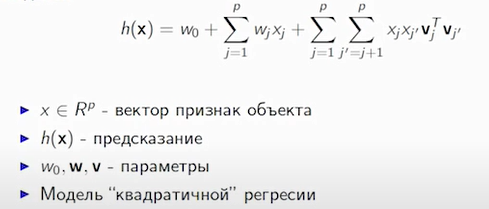

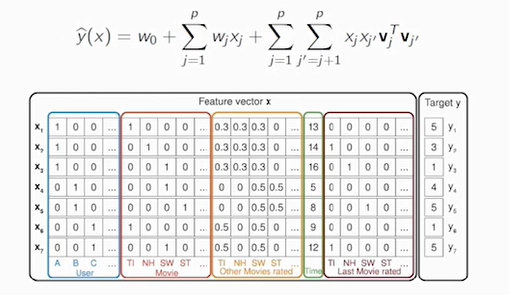

### Validation

Для получения `train/test` или `train/validation/test` есть несколько способов:

**Random Split**

Обычно применяется схема `Leave-One-Out` или `Leave-P-Out`. Идея проста, давайте для одного (`Leave-One-Out`) или нескольких (`Leave-P-out`) пользователей, для которых есть больше 2 взаимодействий, оставим одно взаимодействие в качестве теста. На практике такой метод редко применяется по двум причинам:
- Дорогостоящая схема проверки, на боевых данных такое считаться будет долго
- Часто в данных присутствует временная зависимость

**Time Split**

Чаще всего встречается на практике. Обычно выбирается размер test по времени (период дат) для разделения на train/test.

Например: test - 7 послдених дней

### Popular Baseline
Самым популярным бейзлайном является просто построение популярного. Гиперпараметром такой модели может быть например окно, за которое мы считаем популярное.

Модель можно расширять за счет учета фичей, чтобы считать популярное в рамках каких-то групп.

Но на самом деле бейзлайны в первую очередь зависят от типа данных. В некоторых случаях это могут быть простые модели (или даже бизнес-правила), которые просто учитывают контекст задачи.

### Выводы
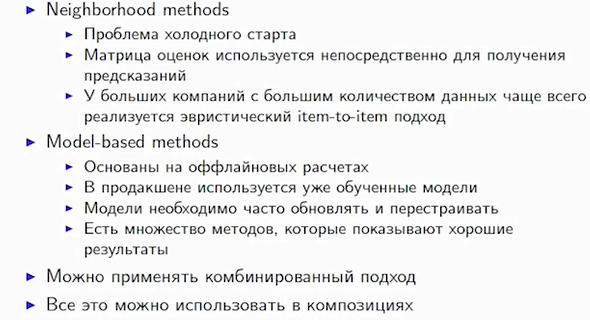

### Советы по Оптимизации DataFrame
Так как такие таблицы могут содержать огромное число строк и много нулей или пропущенных значений, то необходимо оптимизировать исходный DataFrame для предотвращения проблем переполнения памяти
- `user_id` и `item_id` приводить к `CategoricalDType`
- Пропущенные значения приводить к `float` или `IntegerDType` 

**Это в среднем приводит к 20-80 % экономии памяти**

Для работы с разреженными матрицами используется `scipy.sparse`

### Основные Виды Sparse Matrix
- `coo_matrix` - Sparse Matrix in COOrdinate format
- `csr/csc_matrix` - Compressed Sparse Row/Compressed Sparse Column Matrix

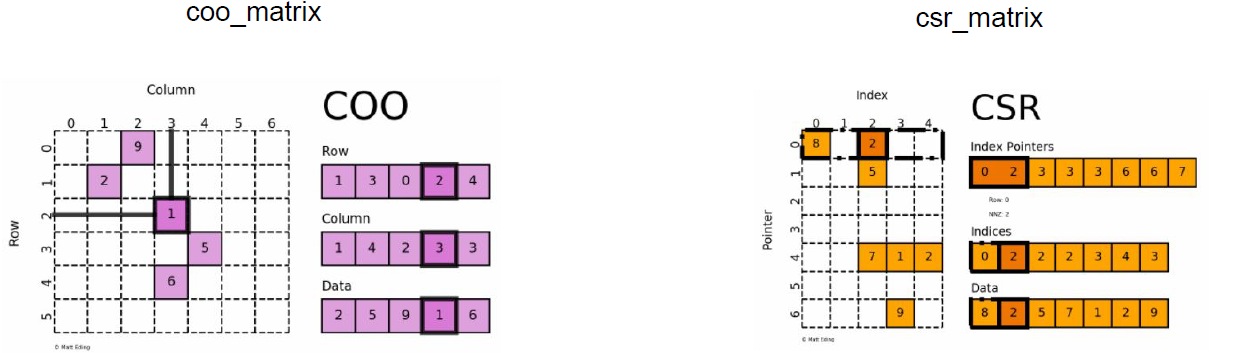